<div class="alert alert-block alert-warning">

<a id='duplicates'></a>

# Data Science Project - Group X
    
</div>

In [ ]:
# TODO LIST

# Split de dataset Numericas Vs Categoricas
# Excluir complaint
# plotar Kramer para categoricas
# Criar idade




## 01 Setup

### 01.01 Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

### 01.02 Import DataFrames

In [134]:
sales = pd.read_excel(r'sales.xlsx')

mkt = pd.read_csv(r'mkt.csv')

crm = pd.read_csv(r'crm.csv')

### 01.03 Duplicates - check and deal with

In [135]:
#Check for sales
sales[sales.duplicated()]

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
2432,26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
3488,17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
4162,28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
4961,28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5009,5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
5310,15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
5319,20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
6948,28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [35]:
# Delete duplicate rows
sales.drop_duplicates(inplace = True)
sales[sales.duplicated()]

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain


In [36]:
#Check for mkt
mkt[mkt.duplicated()]

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
347,28739,0,0,0,0,0
1712,30464,0,0,0,0,0
1896,12320,0,0,0,0,0
2610,5540,0,0,0,0,0
2804,26285,1,0,0,0,0
3112,10265,1,0,0,0,0
3372,29357,0,1,0,0,0
3568,25685,0,0,0,0,0
3688,19295,0,0,1,0,0
4128,8447,0,0,0,0,0


In [37]:
# Delete duplicate rows
mkt.drop_duplicates(inplace = True)
mkt[mkt.duplicated()]

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5


In [38]:
#Check for crm
crm[crm.duplicated()] # No duplicates

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18


### 01.04 Merge between different tables and create DF

In [39]:
df1 = sales.merge(mkt, on = 'CustomerID' )

In [40]:
df = df1.merge(crm, on = 'CustomerID')

### 01.05 Index DF to 'CustomerID'

In [41]:
df.set_index('CustomerID', inplace = True)

## 02 Data exploration

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                6977 non-null   float64
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              6972 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
 14  Response_Cmp1          7000 non-null   int64  
 15 

### 02.01 Types of variables

In [43]:
# Define categorical variables (create dict)

var_type_cat=["Date_Adherence","Name","Education","Marital_Status","Response_Cmp1","Response_Cmp1","Response_Cmp2",
              "Response_Cmp3","Response_Cmp4","Response_Cmp1","Kid_Younger6","Children_6to18"]


### 02.02 Summary of variables info

In [45]:
df.describe()

,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,...,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Birthyear,Income,Kid_Younger6,Children_6to18
count,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,42.556186,2.448429,6.015714,3.834571,...,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286,1976.451429,77988.962407,0.440571,0.490571
std,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,49.650747,2.306968,2.745537,3.331142,...,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675,11.996270,35409.810253,0.543477,0.542174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,2493.800000,0.000000,0.000000
25%,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1967.000000,51586.250000,0.000000,0.000000
50%,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,77190.000000,0.000000,0.000000
75%,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,102016.250000,1.000000,1.000000
max,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2005.000000,237639.725000,2.000000,2.000000


count- The Recency variable has 6977 valid values. The MntDrinks variable has 6972. We have a problem of missing values in here.
mean- In average, my customers spent on Spice Aley 534.75 monetary units;
std-
min- 
50%- 
max- 
Complain has near zero variance; remove

In [136]:
df.skew()

Recency                  0.017785
MntMeat&Fish             1.148867
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046861
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
dtype: float64

Moderate skewness (between |0.5| and |1.0|): NumAppVisitsMonth, NumAppPurchases, NumStorePurchases, Kid_Younger6
High skewness (higher than |1.0|): Response_Cmp5, Response_Cmp4, Response_Cmp3, Response_Cmp2, Response_Cmp1, Complain, NumTakeAwayPurchases, NumOfferPurchases, MntAdditionalRequests, MntDesserts, MntDrinks, MntVegan&Vegetarian, MntEntries, MntMeat&Fish

In [47]:
df.describe(include = ['O'])

,Date_Adherence,Name,Education,Marital_Status
count,7000,7000,6986,7000
unique,701,6241,9,10
top,2020-09-19 00:00:00,Mr. Ryan Baker,Graduation,Married
freq,23,3,3497,2830


We have 9 possible values for Education and 10 for Marital Status: we need to check further if all those values are acceptable.
The Date_Adherence has only 701 values out of 7000 filled.

In [48]:
#calculated the kurtosis

In [138]:
df.kurt(numeric_only=True)

Recency                  -1.192032
MntMeat&Fish              0.532107
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.840467
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
dtype: float64

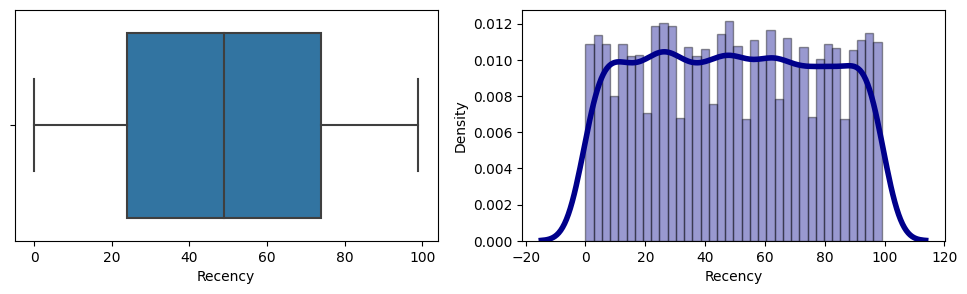

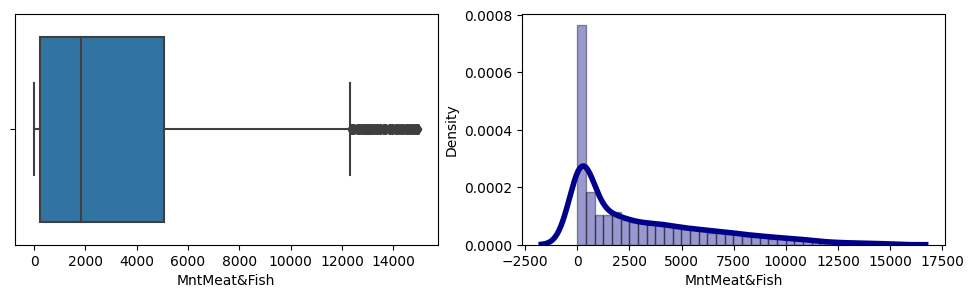

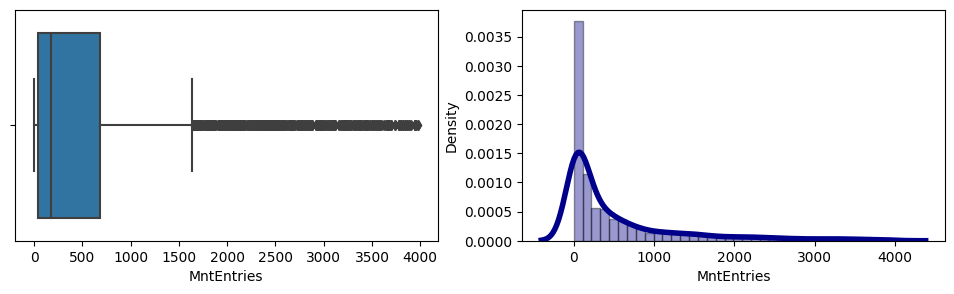

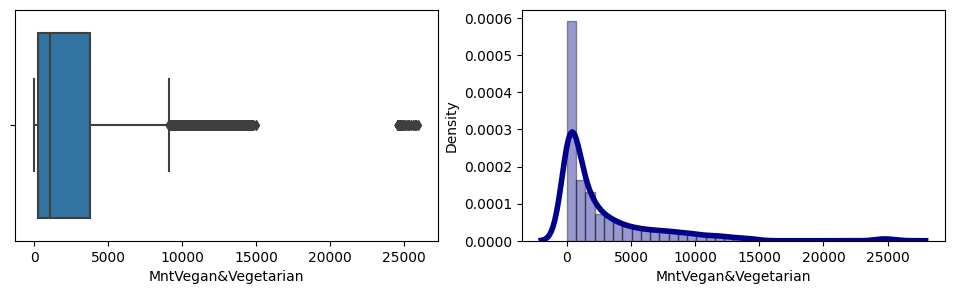

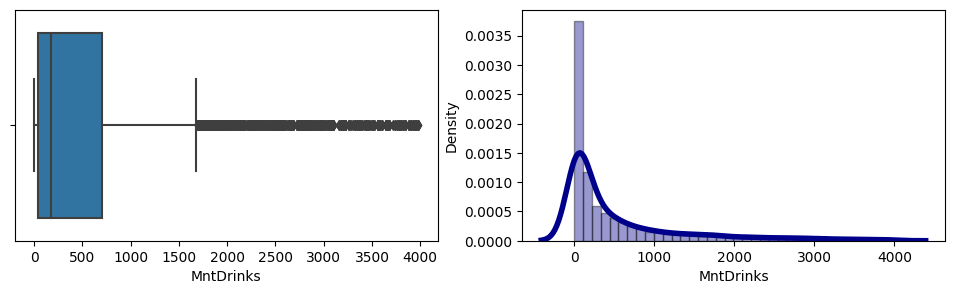

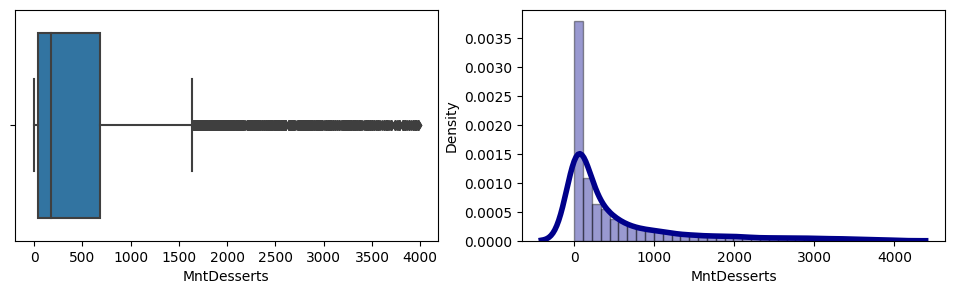

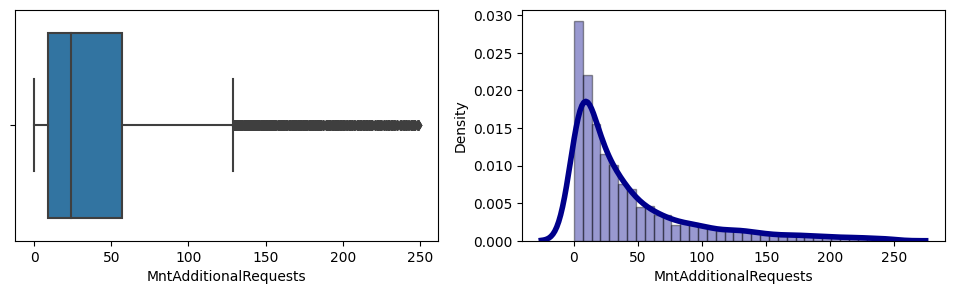

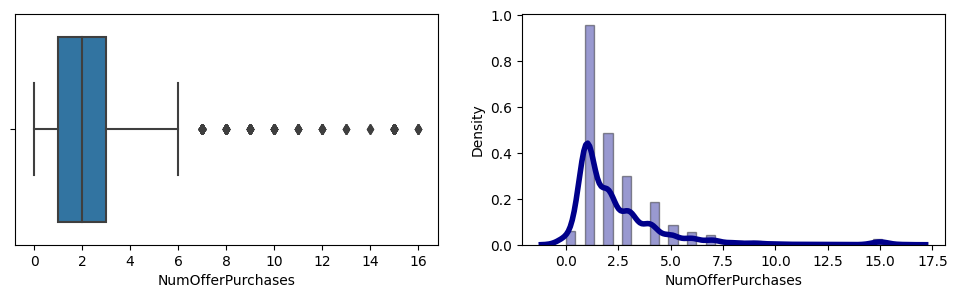

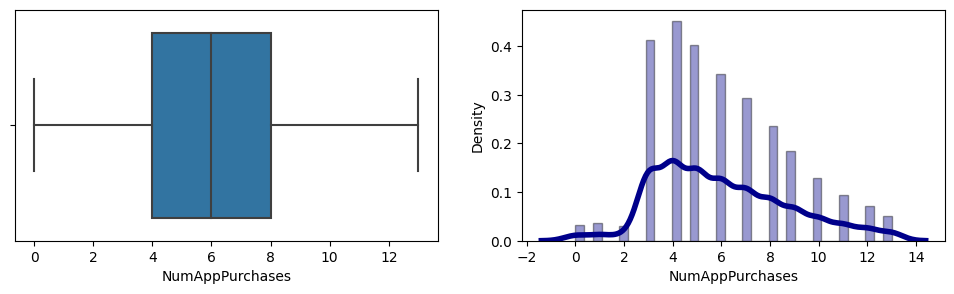

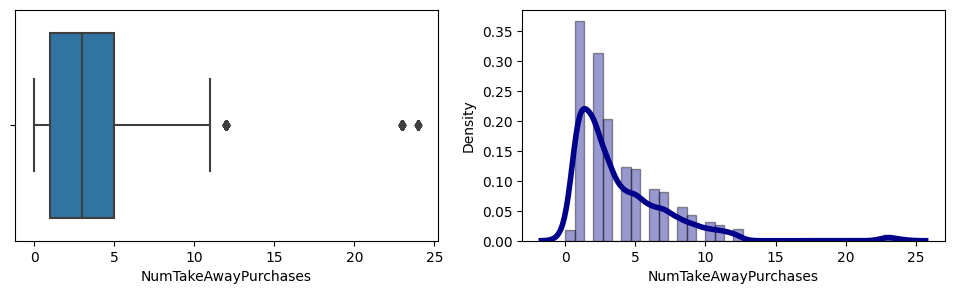

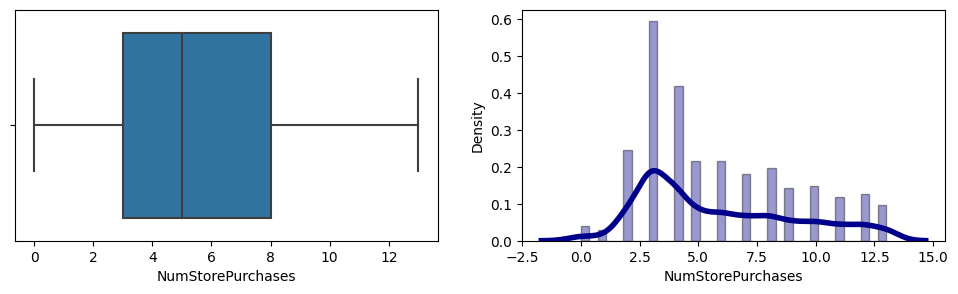

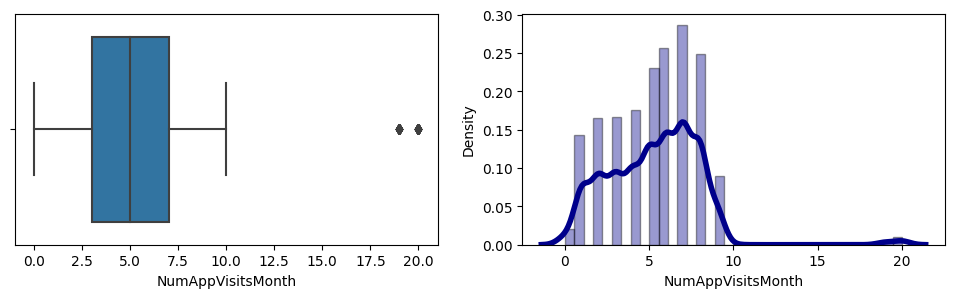

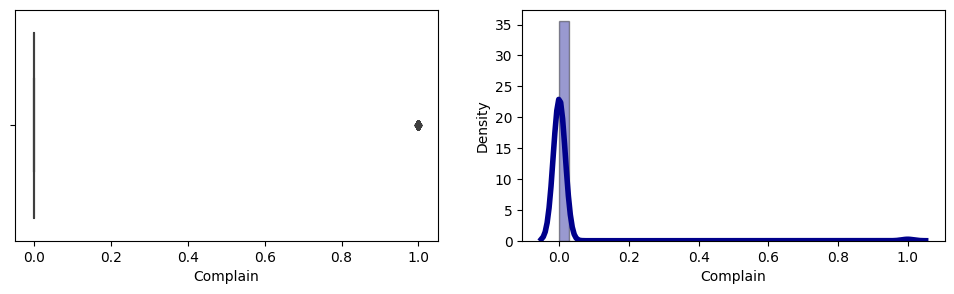

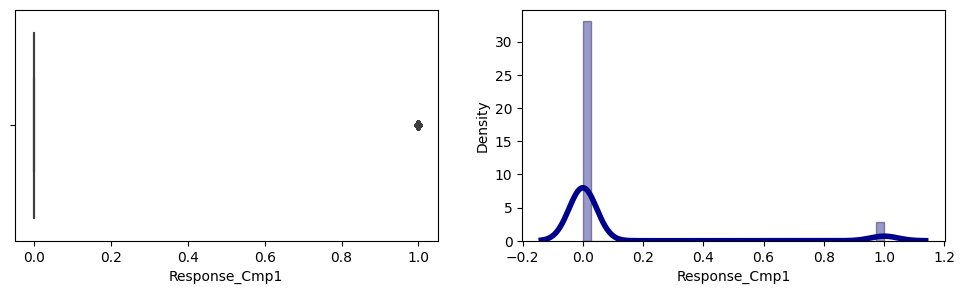

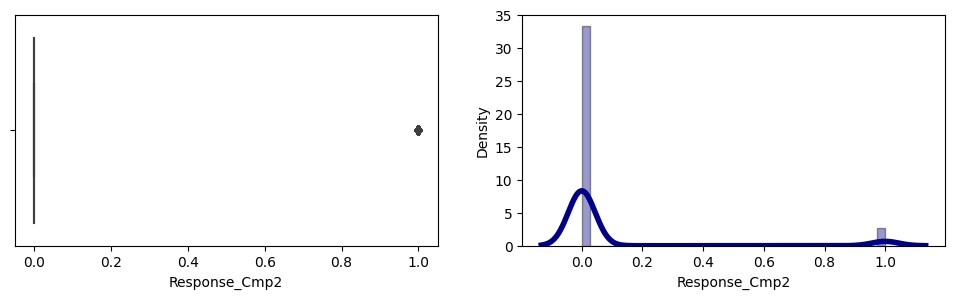

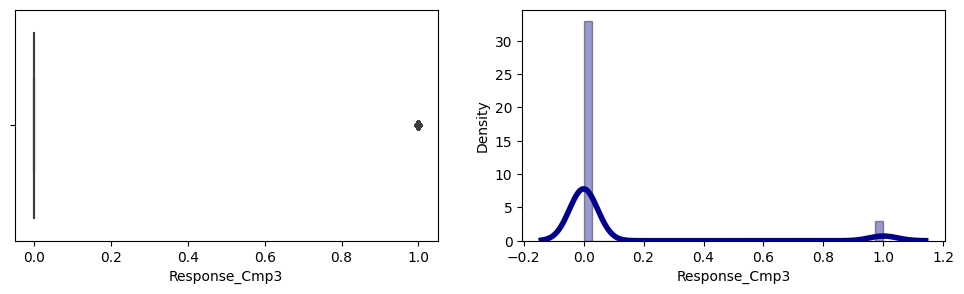

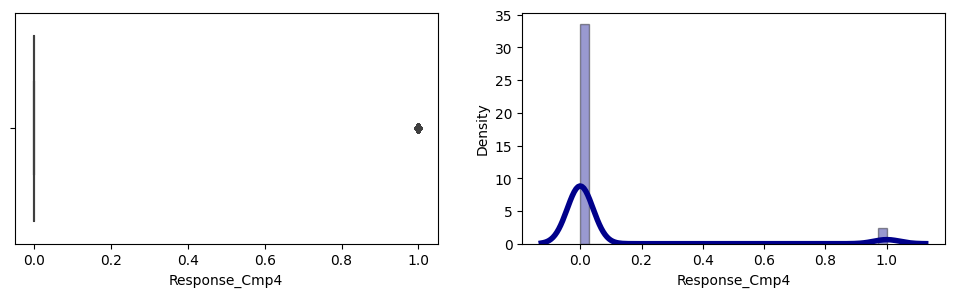

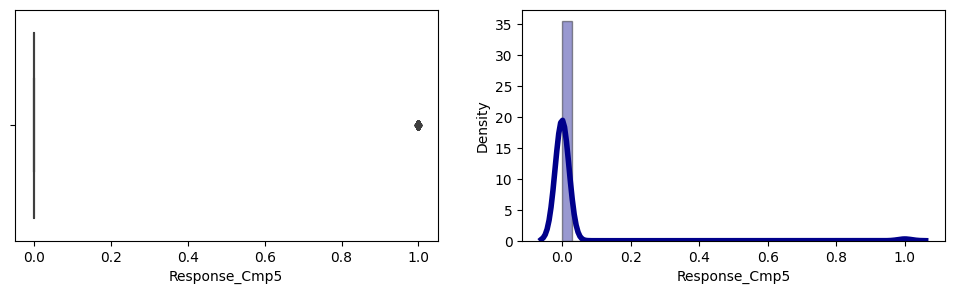

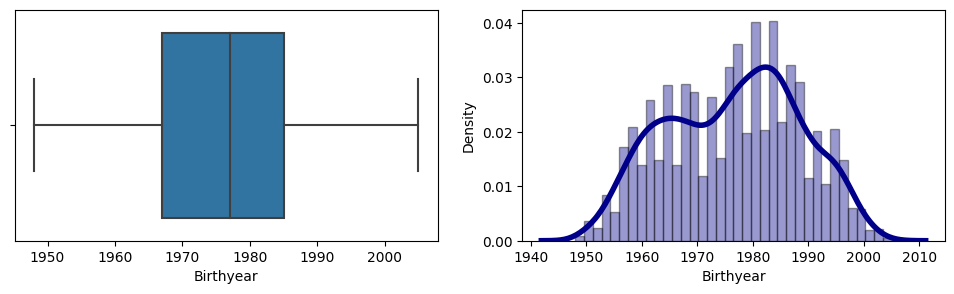

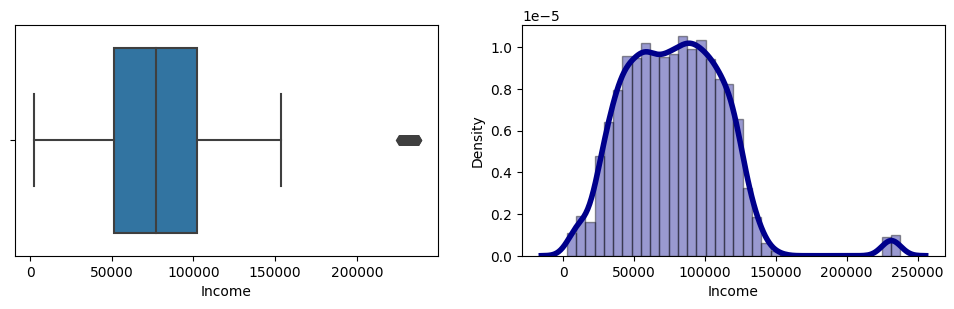

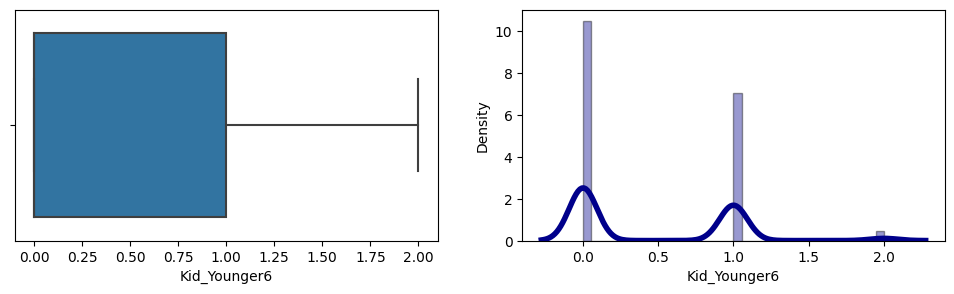

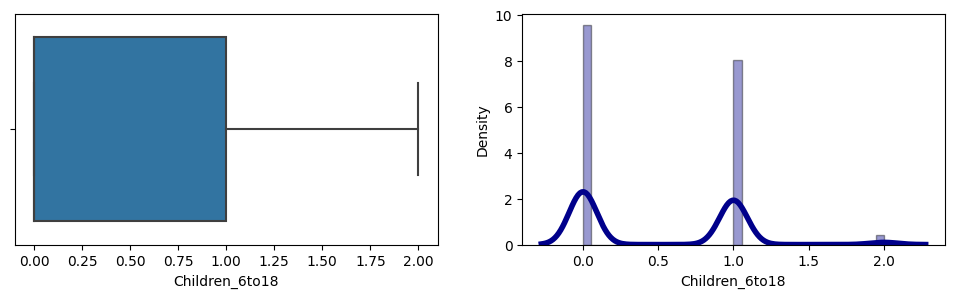

In [139]:
import warnings
warnings.filterwarnings('ignore')

aa=[]

for i in range(len(df.columns)):
    aa.append("a"+str(i))
for i in range(len(df.columns)):
    if(np.issubdtype(df[df.columns[i]].dtype, np.number)==True):
        fig, (aa[i], a2) = plt.subplots(1,2, figsize = (12,3))
        sns.boxplot(ax = aa[i], data = df, x = df.columns[i])
        #sns.displot(data=dsw, x=dsw.columns[i], kde=True)
        sns.distplot(df[df.columns[i]], hist=True, kde=True,bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [50]:
#Values > 3 are problematic 

In [51]:
df['Marital_Status'].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

In [52]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize()
df['Marital_Status'].value_counts()


Married     2866
Together    1706
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

In [53]:
#missing values in 'Education'

In [54]:
df['Education'] = df['Education'].str.capitalize()
df['Education'].value_counts()

Graduation    3504
Phd           1496
Master        1142
Highschool     665
Basic          179
Name: Education, dtype: int64

In [55]:
df['Date_Adherence'].value_counts()

2020-09-19    23
2021-08-22    20
2022-05-23    20
2021-07-30    20
2021-08-21    19
              ..
2021-03-09     3
2020-07-30     2
2021-03-22     2
2020-09-18     2
2020-08-29     2
Name: Date_Adherence, Length: 701, dtype: int64

In [56]:
df['Name'].value_counts()

Mr. Ryan Baker            3
Mr. Charles Payne         3
Mr. Connor Simpson        3
Mr. Simon Abraham         3
Mr. Boris Harris          3
                         ..
Mrs. Dorothy Henderson    1
Mr. Dylan King            1
Miss Pippa Cornish        1
Mr. Frank Gill            1
Mr. Frank Skinner         1
Name: Name, Length: 6241, dtype: int64

### 02.04 Missing values

In [57]:
#Summary
df.isna().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
dtype: int64

#### 02.04.01 "Recency"

<Axes: xlabel='Recency', ylabel='Density'>

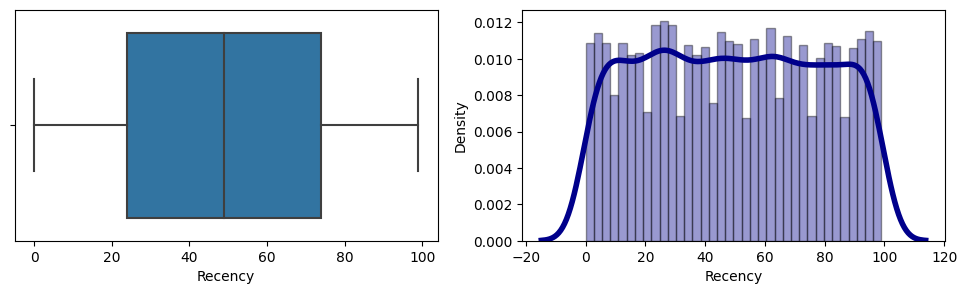

In [60]:
# Analising spearman's correlation matrix, no variable stands out as relevantly correlated.
# As an alternative, in view of the distribution observed, one could argue for the usage of the median.

fig, (aa[1], a2) = plt.subplots(1,2, figsize = (12,3))
sns.boxplot(ax = aa[1], data = df, x = df.columns[1])
sns.distplot(df[df.columns[1]], hist=True, kde=True,bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [61]:
# Replace missing values with median

var_median = df["Recency"].median()
print(var_median)
df["Recency"].fillna(var_median, inplace=True)
df.isna().sum()

49.0


Date_Adherence            0
Recency                   0
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
dtype: int64

#### 02.04.02 "MntDrinks"

In [62]:
#Diagnosis
#For recency and MntDrinks the distribution is not normal. The proposed approach is KNN imputer
# Analising pearsons matrix we observe a relevant correlation on MntDesserts an MntEntries

df_products = df[['MntDrinks','MntEntries', 'MntDesserts']]
imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_products) # this is an array
df_products = pd.DataFrame(array_impute, columns = df_products.columns)

#print(df['MntDrinks'].sum())
#print(df_products['MntDrinks'].sum())
df['MntDrinks'] = df_products['MntDrinks'].values
#print(df['MntDrinks'].sum())
df.isna().sum()


Date_Adherence            0
Recency                   0
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
dtype: int64

#### 02.04.03 "Education"

Date_Adherence            0
Recency                   0
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
dtype: int64
Axes(0.125,0.11;0.775x0.77)


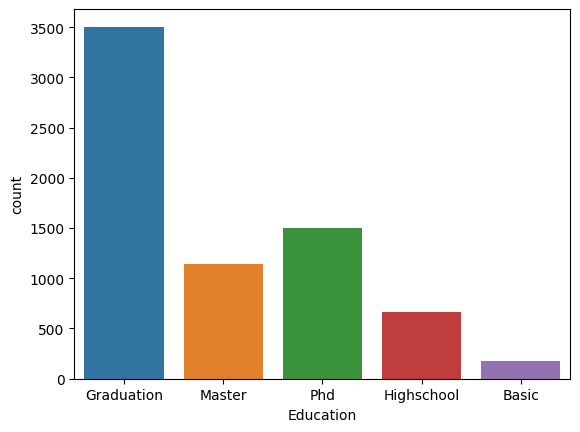

In [63]:
# in order to replace the missing values, due to the nature of the variable, we will replace by the mode.

print(df.isna().sum())
print(sns.countplot(x=df["Education"]))


In [64]:
#Replacing by mode

df.fillna({'Education': df['Education'].mode()[0],}, inplace = True)
df.isna().sum()

Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Complain                 0
Response_Cmp1            0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
dtype: int64

In [137]:
print("Pearson")
df.corr(method = 'pearson').round(decimals=2, out=None)

Pearson


,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,...,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Birthyear,Income,Kid_Younger6,Children_6to18
Recency,1.00,0.04,0.00,0.03,0.01,0.02,0.01,0.01,0.02,0.04,...,0.01,0.01,0.00,0.02,0.02,0.01,0.00,0.02,-0.01,-0.01
MntMeat&Fish,0.04,1.00,0.39,0.48,0.39,0.41,0.38,-0.04,0.58,0.53,...,-0.01,0.03,0.34,0.44,0.34,0.18,-0.16,0.59,-0.48,-0.03
MntEntries,0.00,0.39,1.00,0.46,0.56,0.57,0.37,-0.15,0.29,0.42,...,-0.01,-0.03,0.04,0.22,0.18,0.01,-0.03,0.43,-0.36,-0.20
MntVegan&Vegetarian,0.03,0.48,0.46,1.00,0.46,0.46,0.29,0.04,0.18,0.75,...,-0.01,-0.01,0.10,0.35,0.27,0.05,-0.07,0.66,-0.37,-0.24
MntDrinks,0.01,0.39,0.56,0.46,1.00,0.55,0.38,-0.15,0.30,0.42,...,-0.00,-0.04,0.05,0.22,0.18,0.01,-0.02,0.43,-0.36,-0.20
MntDesserts,0.02,0.41,0.57,0.46,0.55,1.00,0.37,-0.15,0.31,0.42,...,-0.01,-0.04,0.05,0.26,0.20,0.01,-0.05,0.44,-0.36,-0.20
MntAdditionalRequests,0.01,0.38,0.37,0.29,0.38,0.37,1.00,0.01,0.41,0.34,...,-0.01,0.16,0.06,0.16,0.14,0.03,-0.05,0.32,-0.29,-0.05
NumOfferPurchases,0.01,-0.04,-0.15,0.04,-0.15,-0.15,0.01,1.00,0.11,0.16,...,0.01,0.05,0.00,-0.15,-0.08,0.01,-0.07,-0.09,0.22,0.33
NumAppPurchases,0.02,0.58,0.29,0.18,0.30,0.31,0.41,0.11,1.00,0.27,...,-0.00,0.05,0.18,0.14,0.15,0.09,-0.12,0.35,-0.32,0.13
NumTakeAwayPurchases,0.04,0.53,0.42,0.75,0.42,0.42,0.34,0.16,0.27,1.00,...,0.01,0.05,0.14,0.31,0.26,0.09,-0.11,0.60,-0.41,-0.13


In [ ]:
df.query('Recency.isna()')

In [66]:
df_products = df[['Recency','MntDrinks']]
imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_products) # this is an array
df_products = pd.DataFrame(array_impute, columns = df_products.columns)

print(df['Recency'].sum())
print(df['MntDrinks'].sum())

print(df_products['Recency'].sum())
print(df_products['MntDrinks'].sum())



344640.0
3819968.4000000004
344640.0
3819968.4000000004


### 02.02 Variable graphical analisis

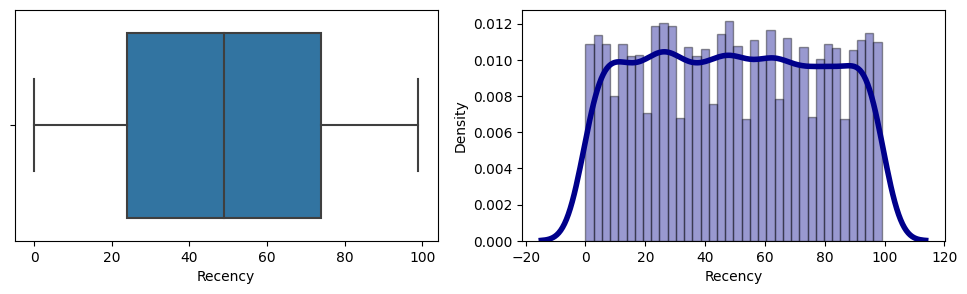

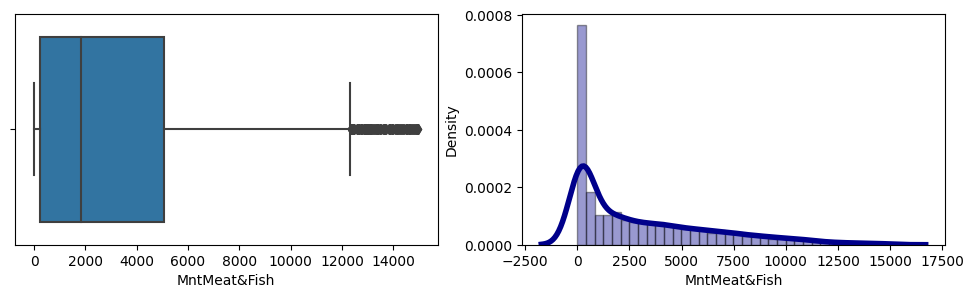

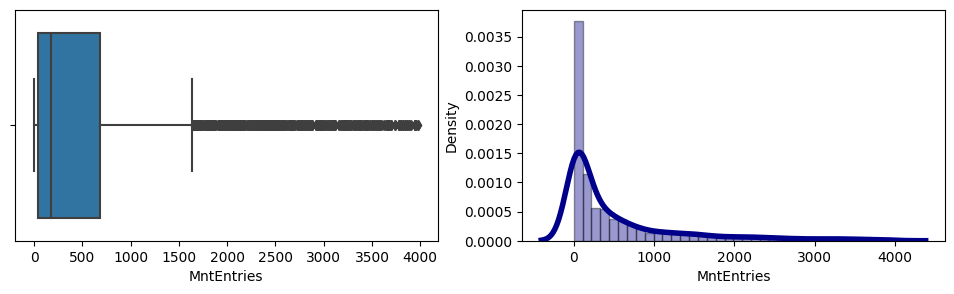

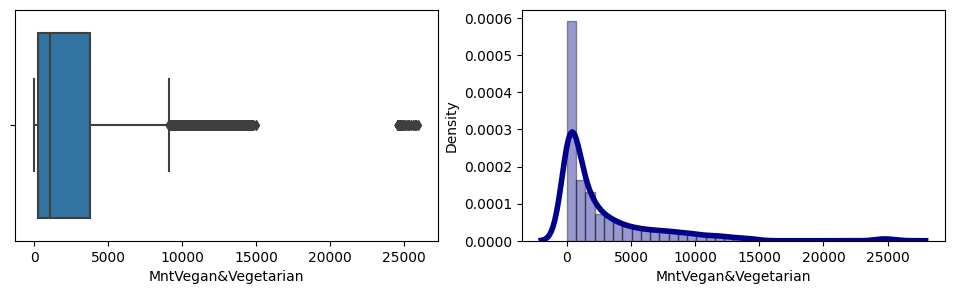

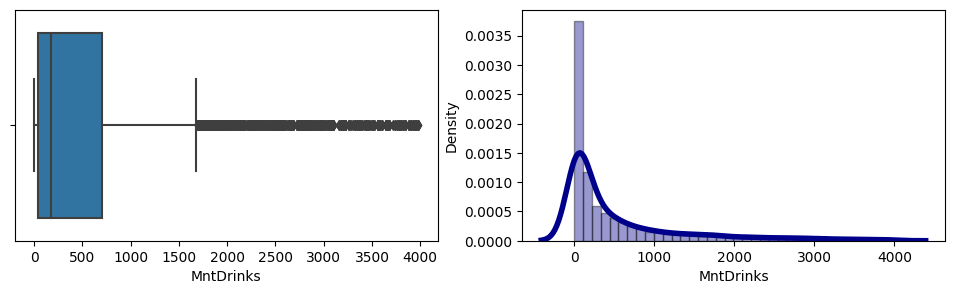

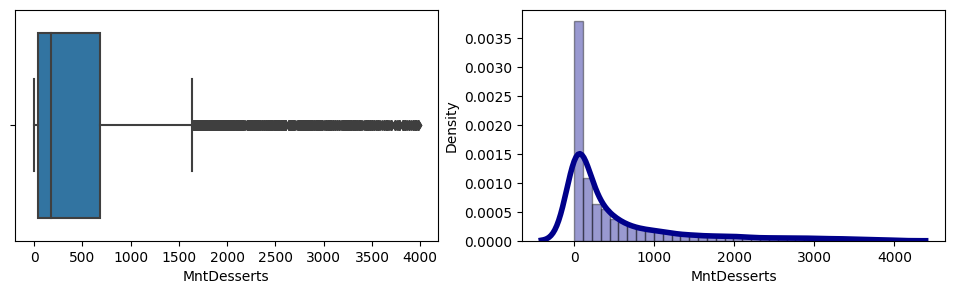

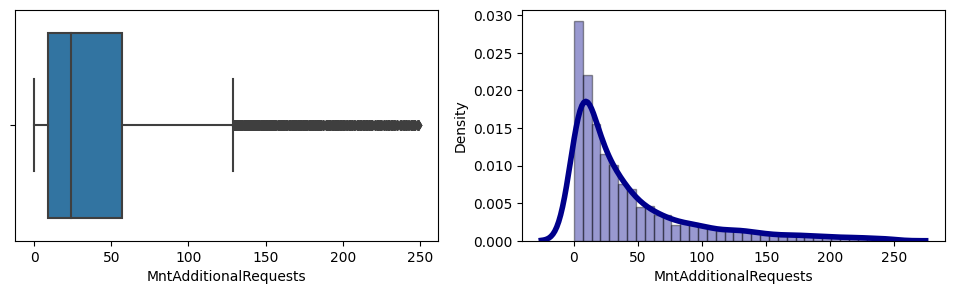

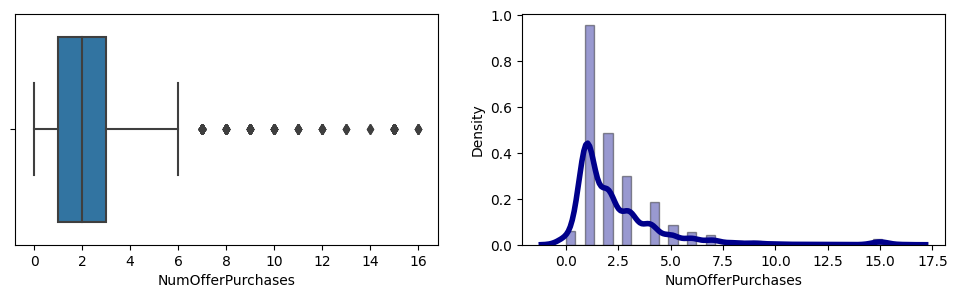

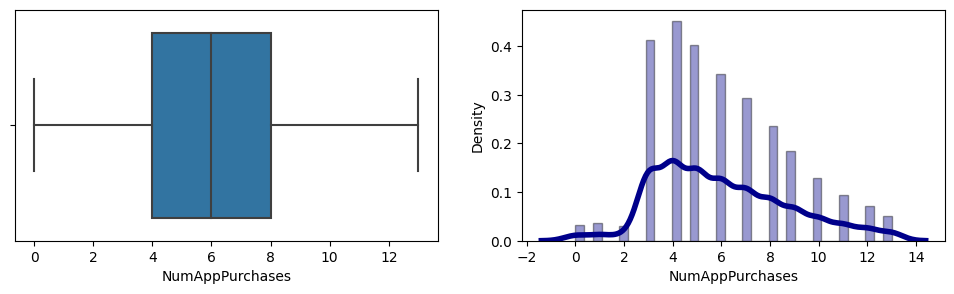

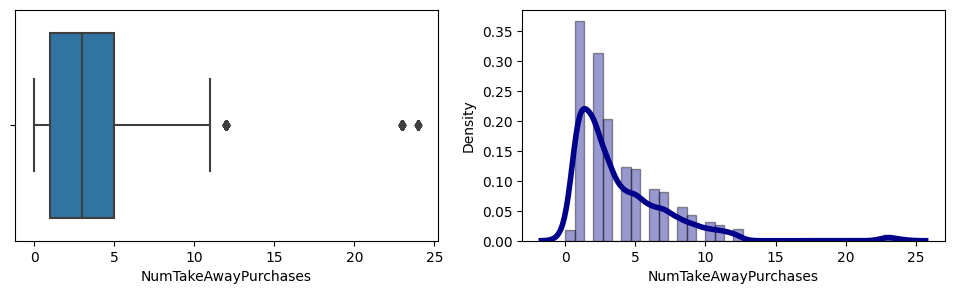

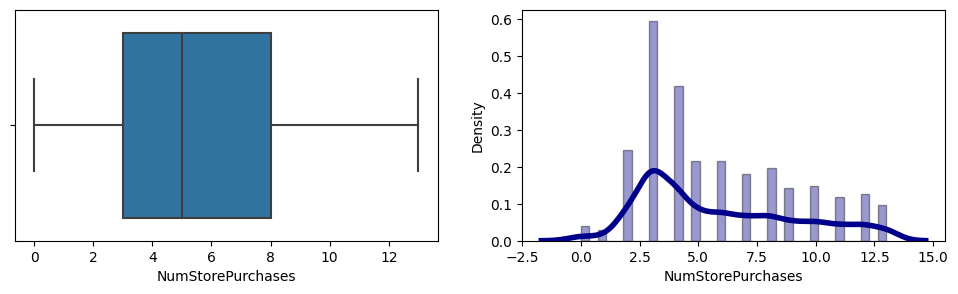

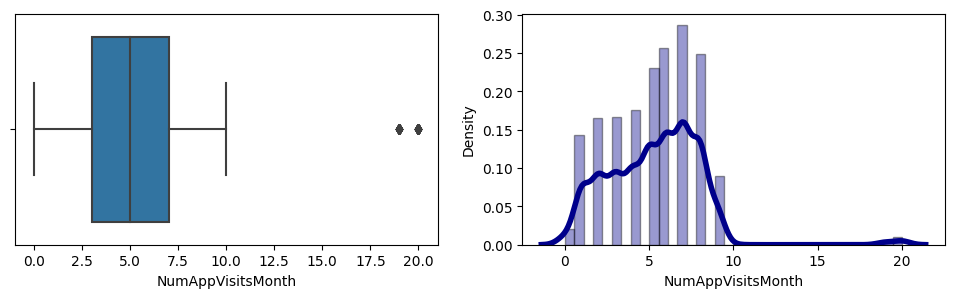

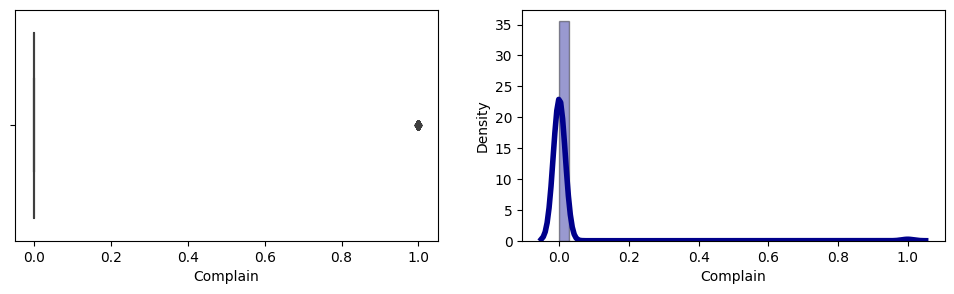

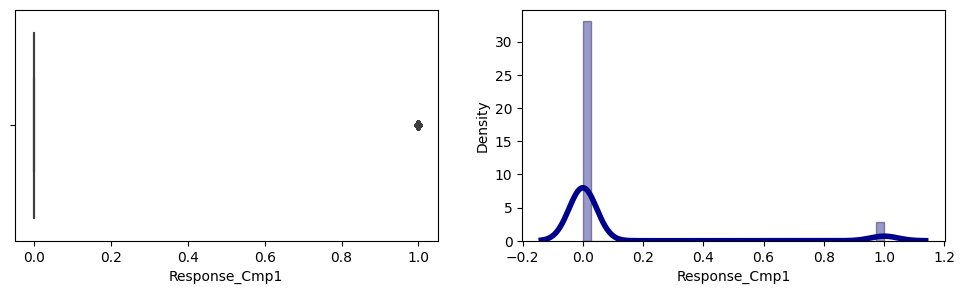

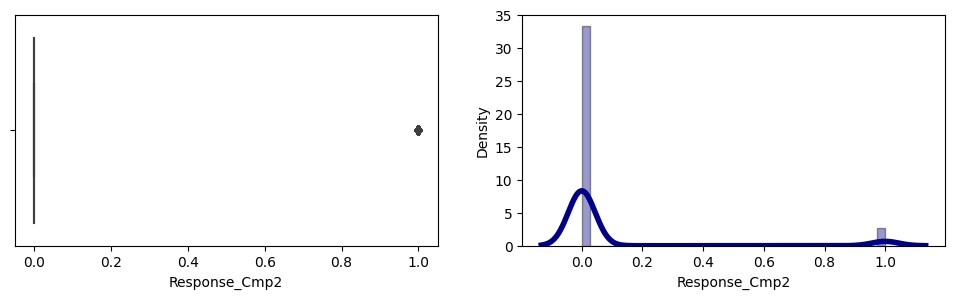

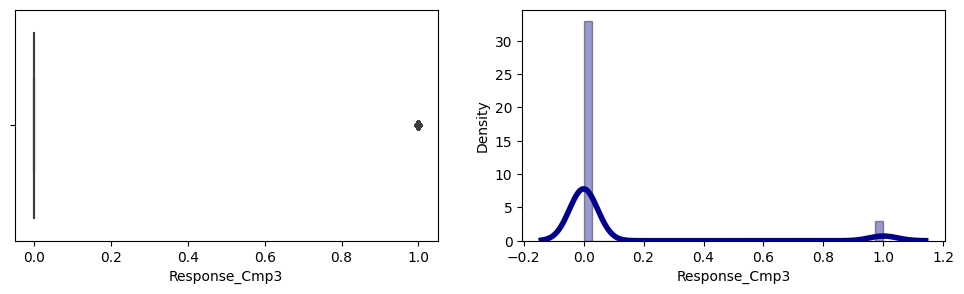

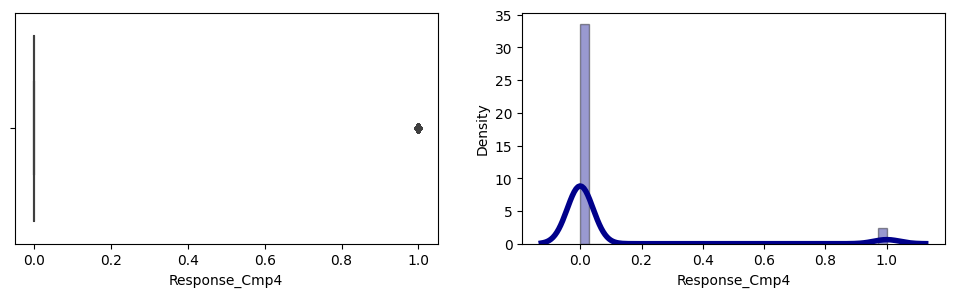

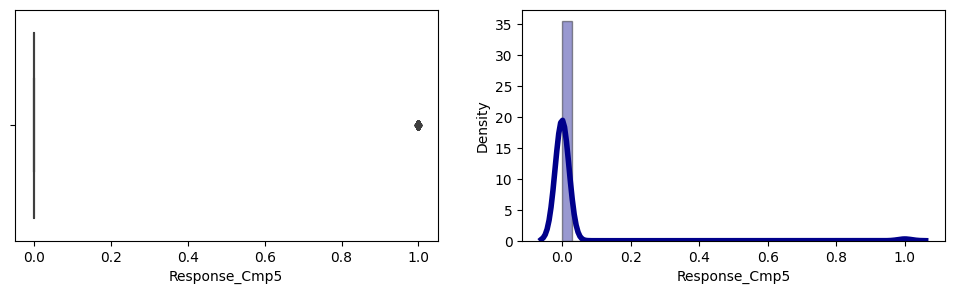

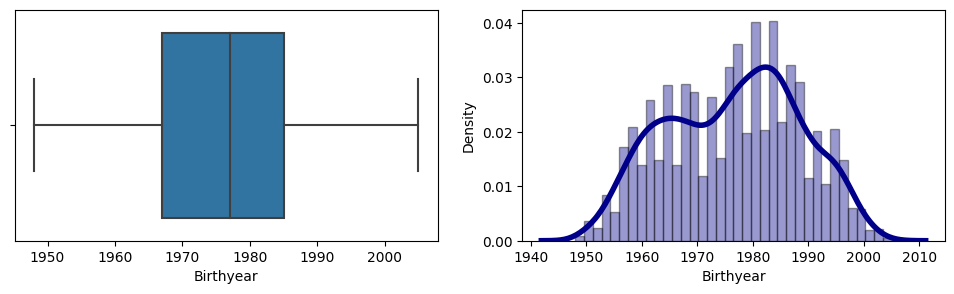

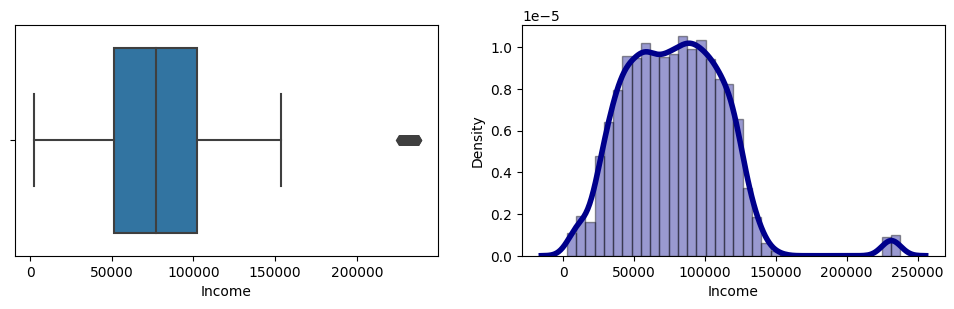

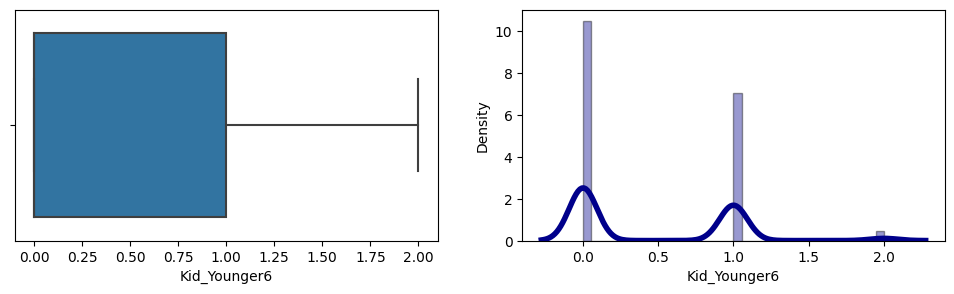

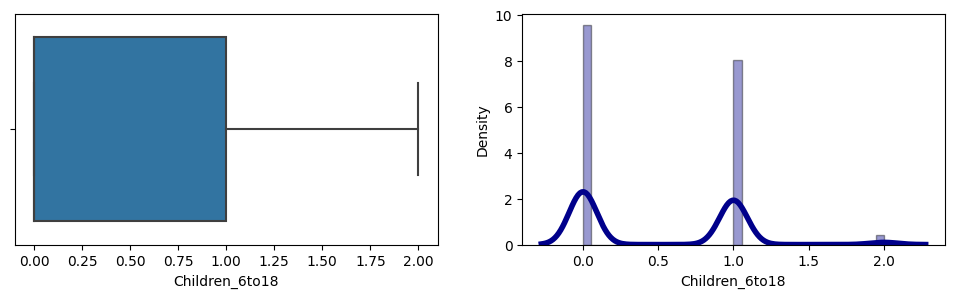

In [67]:
import warnings
warnings.filterwarnings('ignore')

aa=[]

for i in range(len(df.columns)):
    aa.append("a"+str(i))
for i in range(len(df.columns)):
    if(np.issubdtype(df[df.columns[i]].dtype, np.number)==True):
        fig, (aa[i], a2) = plt.subplots(1,2, figsize = (12,3))
        sns.boxplot(ax = aa[i], data = df, x = df.columns[i])
        #sns.displot(data=dsw, x=dsw.columns[i], kde=True)
        sns.distplot(df[df.columns[i]], hist=True, kde=True,bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [68]:
df['Complain'].value_counts()

0    6928
1      72
Name: Complain, dtype: int64

<Axes: xlabel='Income', ylabel='MntMeat&Fish'>

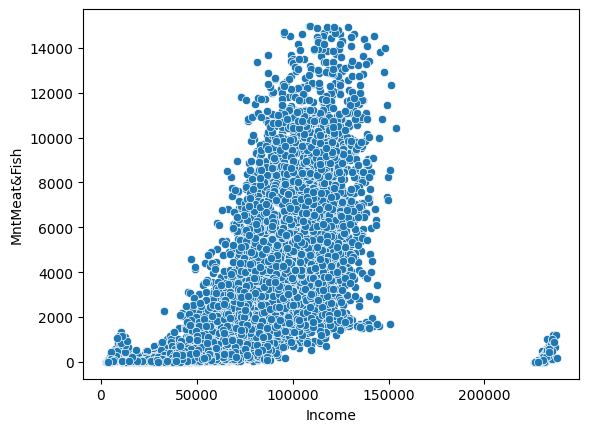

In [69]:
sns.scatterplot(data = df, x = 'Income', y= 'MntMeat&Fish')

<Axes: xlabel='Income', ylabel='MntEntries'>

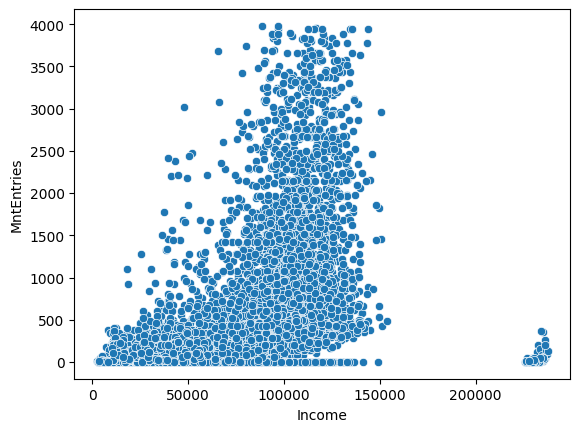

In [70]:
sns.scatterplot(data = df, x = 'Income', y= 'MntEntries')

<Axes: xlabel='Income', ylabel='MntDesserts'>

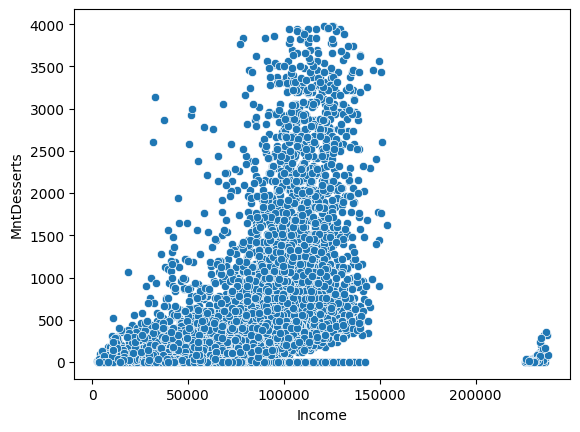

In [71]:
sns.scatterplot(data = df, x = 'Income', y= 'MntDesserts')

In [72]:
print(df)

                 Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                           
11054       2021-03-18 00:00:00     85.0        7230.0        1820   
17117       2021-03-01 00:00:00     96.0        5850.0         320   
31751       2021-11-01 00:00:00      7.0        8380.0           0   
12947       2022-05-19 00:00:00     54.0        5090.0         280   
11402       2021-01-01 00:00:00     64.0         330.0           0   
...                         ...      ...           ...         ...   
23699       2021-11-27 00:00:00     54.0         290.0          20   
23255       2021-03-25 00:00:00     27.0         230.0          80   
5798        2022-04-12 00:00:00     36.0        3050.0        2460   
16577       2020-09-01 00:00:00     49.0          20.0         200   
25310       2020-12-05 00:00:00     74.0         160.0         100   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                    

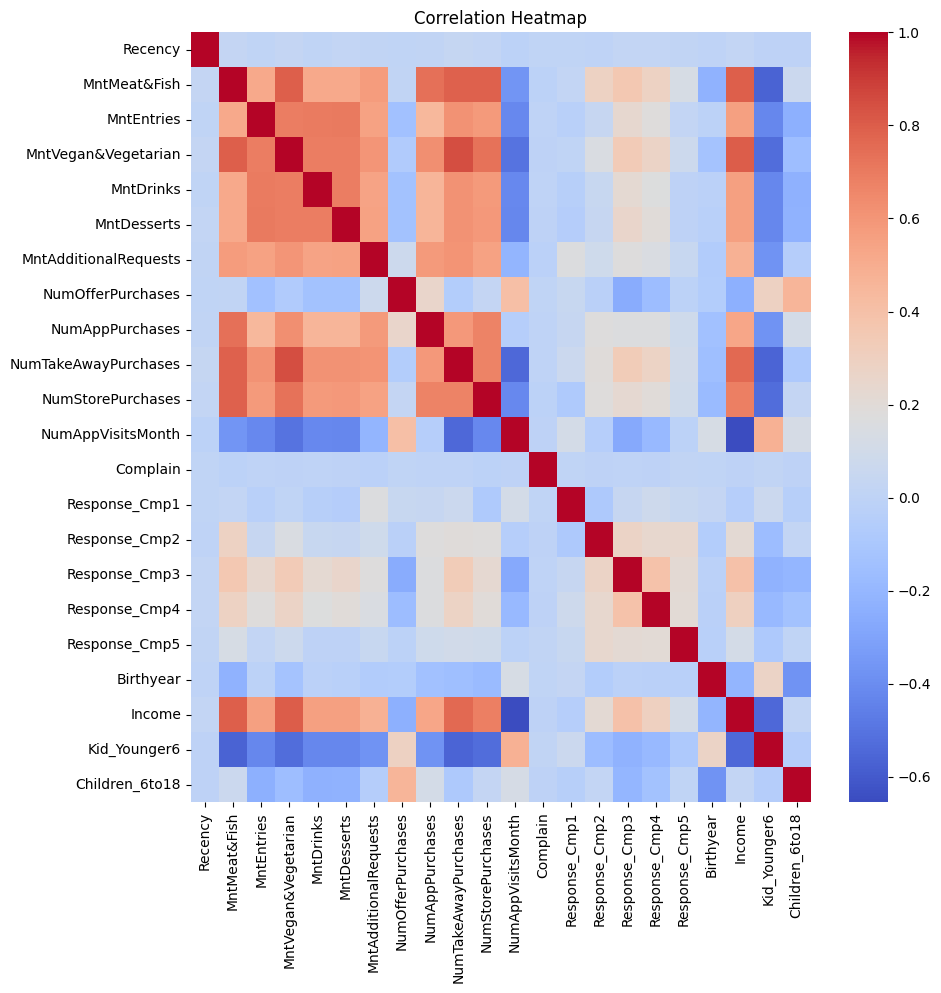

In [73]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr(method="spearman")
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

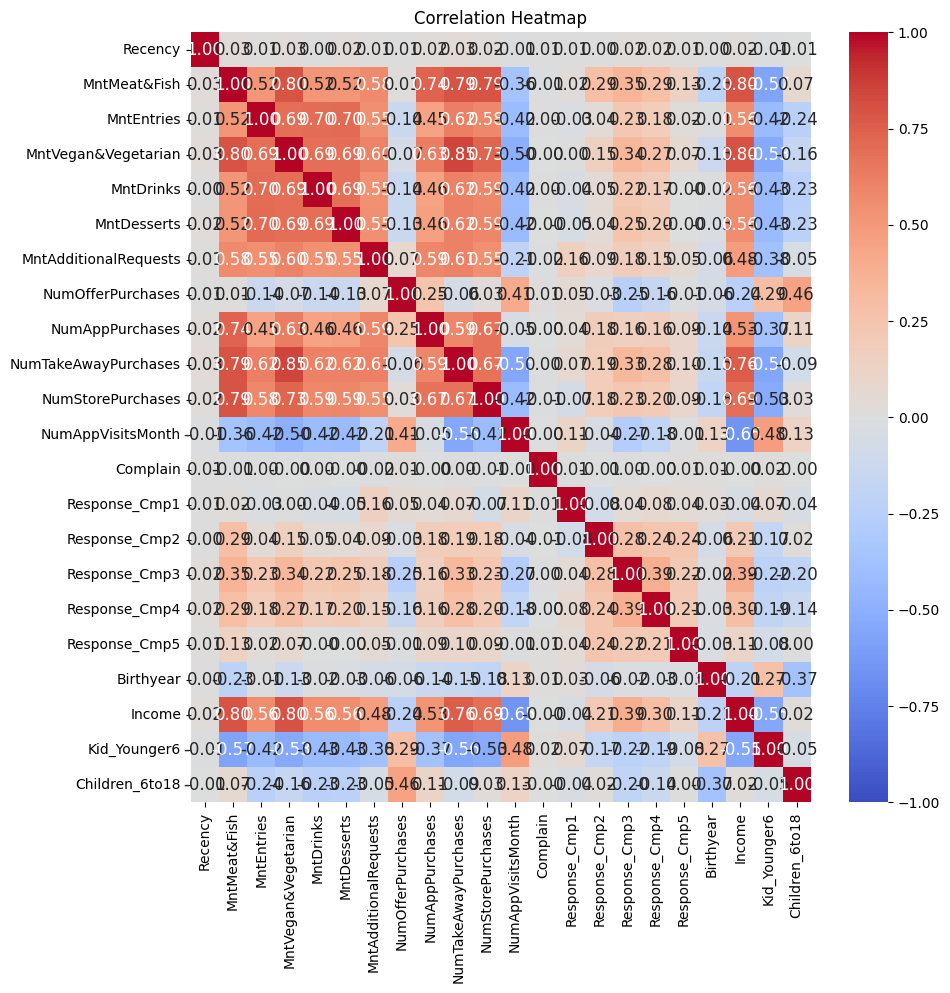

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr(method="spearman")

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin = -1, vmax = 1, annot_kws={"size": 12})
# 'annot' parameter adds the correlation values to the heatmap, 
# 'fmt' parameter specifies the format of the displayed value, 
# 'annot_kws' parameter specifies the size of the font of the annotations.

plt.title("Correlation Heatmap")
plt.show()

In [75]:
df.corr()
corr_matrix = df.corr().round(2)
corr_matrix

,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,...,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Birthyear,Income,Kid_Younger6,Children_6to18
Recency,1.00,0.04,0.00,0.03,0.01,0.02,0.01,0.01,0.02,0.04,...,0.01,0.01,0.00,0.02,0.02,0.01,0.00,0.02,-0.01,-0.01
MntMeat&Fish,0.04,1.00,0.39,0.48,0.39,0.41,0.38,-0.04,0.58,0.53,...,-0.01,0.03,0.34,0.44,0.34,0.18,-0.16,0.59,-0.48,-0.03
MntEntries,0.00,0.39,1.00,0.46,0.56,0.57,0.37,-0.15,0.29,0.42,...,-0.01,-0.03,0.04,0.22,0.18,0.01,-0.03,0.43,-0.36,-0.20
MntVegan&Vegetarian,0.03,0.48,0.46,1.00,0.46,0.46,0.29,0.04,0.18,0.75,...,-0.01,-0.01,0.10,0.35,0.27,0.05,-0.07,0.66,-0.37,-0.24
MntDrinks,0.01,0.39,0.56,0.46,1.00,0.55,0.38,-0.15,0.30,0.42,...,-0.00,-0.04,0.05,0.22,0.18,0.01,-0.02,0.43,-0.36,-0.20
MntDesserts,0.02,0.41,0.57,0.46,0.55,1.00,0.37,-0.15,0.31,0.42,...,-0.01,-0.04,0.05,0.26,0.20,0.01,-0.05,0.44,-0.36,-0.20
MntAdditionalRequests,0.01,0.38,0.37,0.29,0.38,0.37,1.00,0.01,0.41,0.34,...,-0.01,0.16,0.06,0.16,0.14,0.03,-0.05,0.32,-0.29,-0.05
NumOfferPurchases,0.01,-0.04,-0.15,0.04,-0.15,-0.15,0.01,1.00,0.11,0.16,...,0.01,0.05,0.00,-0.15,-0.08,0.01,-0.07,-0.09,0.22,0.33
NumAppPurchases,0.02,0.58,0.29,0.18,0.30,0.31,0.41,0.11,1.00,0.27,...,-0.00,0.05,0.18,0.14,0.15,0.09,-0.12,0.35,-0.32,0.13
NumTakeAwayPurchases,0.04,0.53,0.42,0.75,0.42,0.42,0.34,0.16,0.27,1.00,...,0.01,0.05,0.14,0.31,0.26,0.09,-0.11,0.60,-0.41,-0.13


In [76]:
corr_matrix = df.corr().abs()  # Compute the absolute values of the correlation coefficients
corr_matrix = corr_matrix[corr_matrix > 0.6]  # Select only the values greater than 0.7
corr_matrix = corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)  # Remove rows and columns with only NaN values
corr_matrix

,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,...,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Birthyear,Income,Kid_Younger6,Children_6to18
Recency,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeat&Fish,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntEntries,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntVegan&Vegetarian,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.749741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.657473,NaN,NaN
MntDrinks,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntDesserts,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntAdditionalRequests,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumOfferPurchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumAppPurchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTakeAwayPurchases,NaN,NaN,NaN,0.749741,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.602108,NaN,NaN


!!dividir as variaveis entre categoricas e numericas!!

<Axes: xlabel='NumTakeAwayPurchases', ylabel='MntVegan&Vegetarian'>

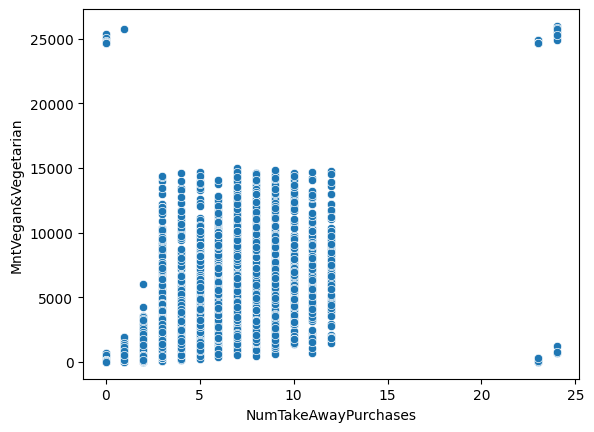

In [77]:
sns.scatterplot(data = df, x = 'NumTakeAwayPurchases', y= 'MntVegan&Vegetarian')

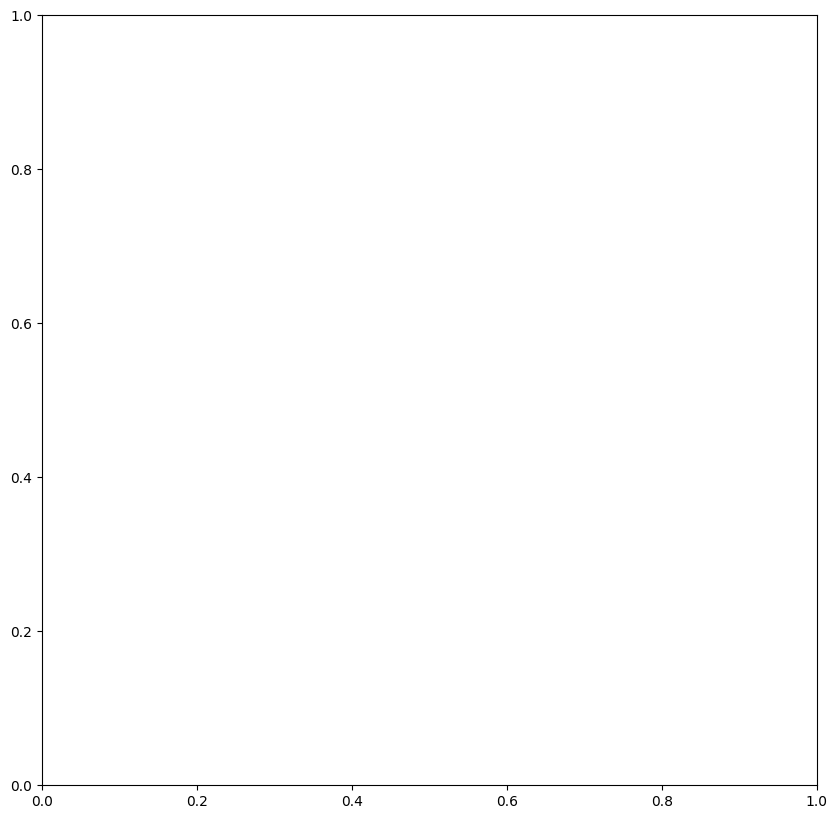

In [78]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10,10))



<Axes: xlabel='Income', ylabel='MntVegan&Vegetarian'>

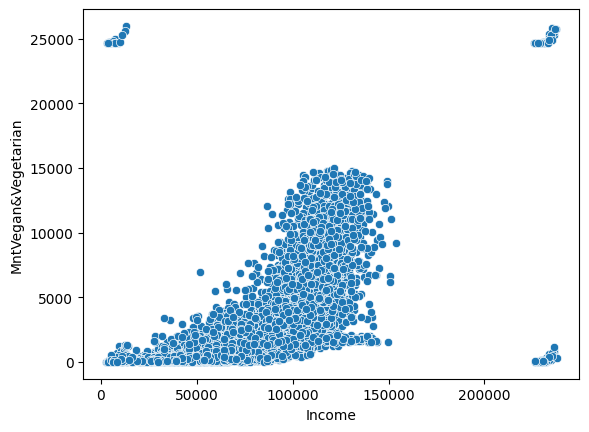

In [79]:
sns.scatterplot(data = df, x = 'Income', y= 'MntVegan&Vegetarian')

In [80]:
top_10 = df.nlargest(80, 'Income')

print(top_10)

                 Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                           
19586       2021-03-24 00:00:00     41.0         176.5         126   
15638       2021-02-11 00:00:00     39.0        1213.0          90   
26432       2021-04-26 00:00:00      4.0         661.0         142   
31208       2021-04-11 00:00:00     26.0         160.1         228   
33947       2020-11-01 00:00:00     32.0         777.0         258   
...                         ...      ...           ...         ...   
23372       2021-03-09 00:00:00     66.0           7.0           4   
15041       2022-05-30 00:00:00     31.0           3.0           4   
7685        2021-05-08 00:00:00     59.0          10.0          10   
5132        2021-11-04 00:00:00     52.0           6.0          12   
18380       2020-09-16 00:00:00     83.0          20.0           8   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                    

In [81]:
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0

SyntaxError: invalid syntax (1826522387.py, line 1)

# Experiments

Pre - BoxCox
Post - BoxCox


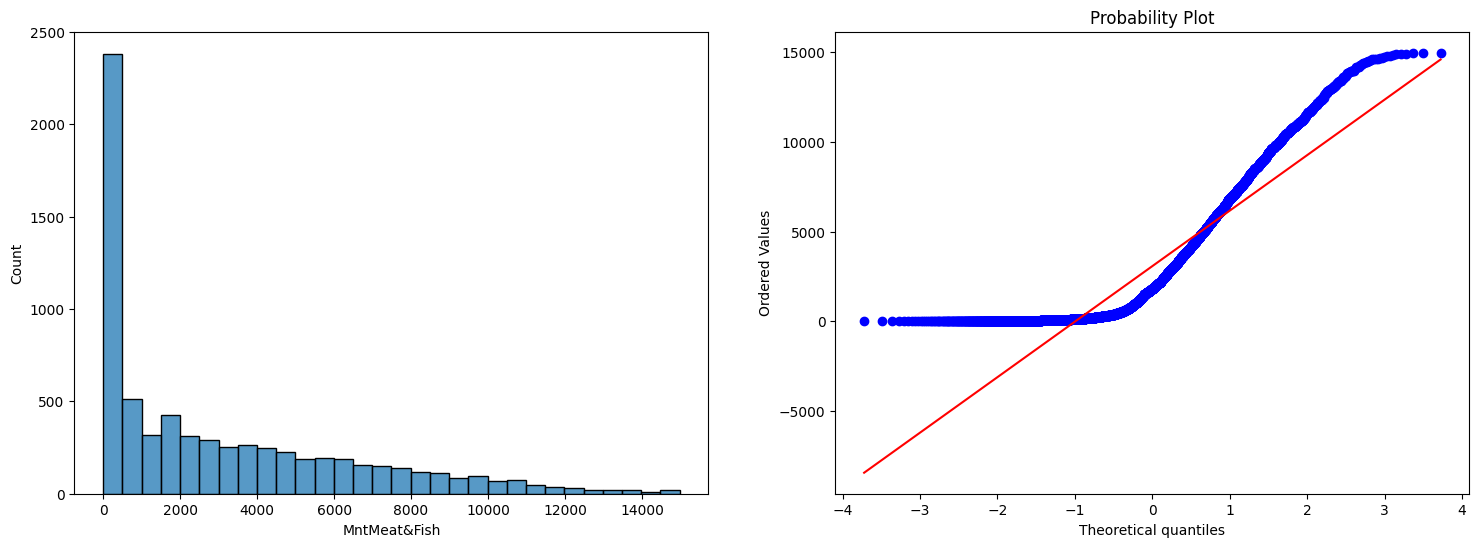

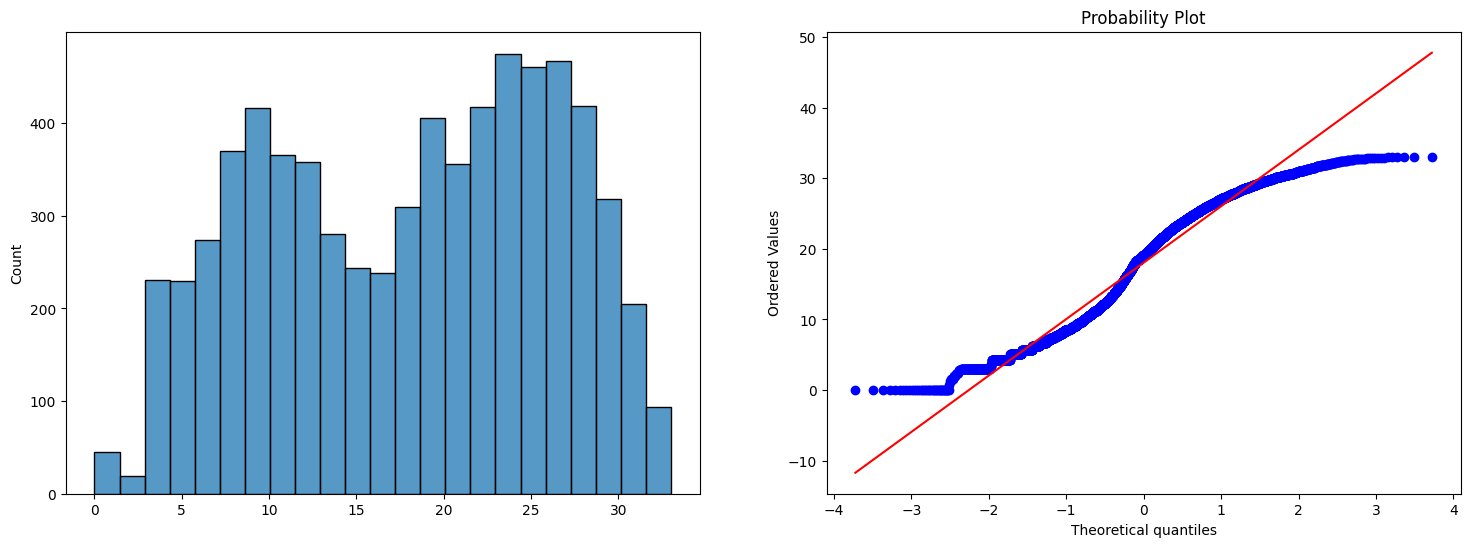

In [84]:
# BOX COX

# Import library
import scipy.stats as scs
from scipy import stats
import matplotlib.pyplot as plt

aaaaa=df

aaaaa["MntMeat&Fish"]
aaaaa.loc[df['MntMeat&Fish'] == 0, 'MntMeat&Fish'] = 1

df["MntMeat&Fish"].describe()
var_analisis = aaaaa['MntMeat&Fish']

print("Pre - BoxCox")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(var_analisis, ax=g[0]);
g2 = scs.probplot(var_analisis, dist='norm', plot=plt);

# Transformation Box-Cox

fit_price, lam = scs.boxcox(var_analisis)
print("Post - BoxCox")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(fit_price, ax=g[0]);
g2 = scs.probplot(fit_price, dist='norm', plot=plt);




In [82]:
# Stats
pd.DataFrame(fit_price).describe().round(2).T

NameError: name 'fit_price' is not defined

In [83]:
pd.DataFrame(df['Income']).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,7000.0,77988.96,35409.81,2493.8,51586.25,77190.0,102016.25,237639.72


In [ ]:
out=np.count_nonzero(fit_price < fit_price.mean()-fit_price.std())+np.count_nonzero(fit_price > fit_price.mean()+fit_price.std())

In [ ]:
(7000-out)/len(fit_price)

## Transformação inversa hiperbólica do Seno

In [92]:
import math

f = math.asinh(0.5)

print(f)

0.48121182505960347


In [115]:
bbb=df
print(df["MntEntries"].sum())
aaa=bbb['MntEntries'].apply(lambda x: math.asinh(x))
print(aaa.sum())

3743246
36558.48236701893


In [102]:
aaa.describe()

count    7000.000000
mean        5.222640
std         2.695304
min         0.000000
25%         4.382183
50%         5.886112
75%         7.215241
max         8.982184
Name: MntEntries, dtype: float64

In [ ]:
df['MntEntries'].sum()

Pre - BoxCox
Pre - BoxCox


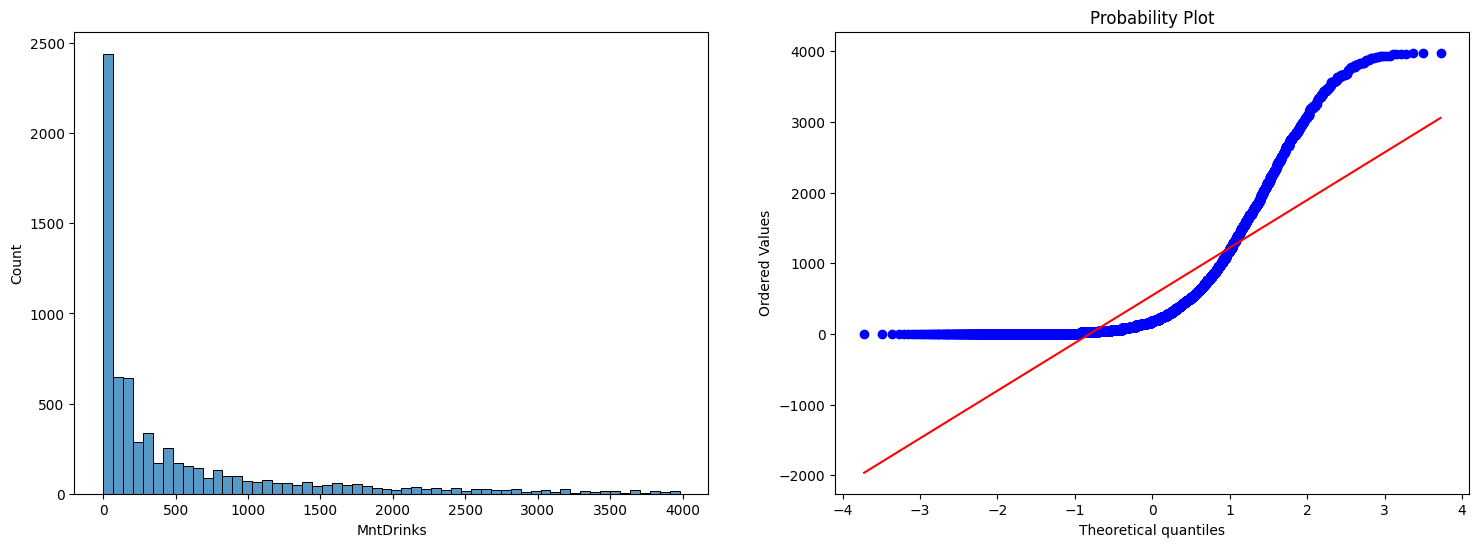

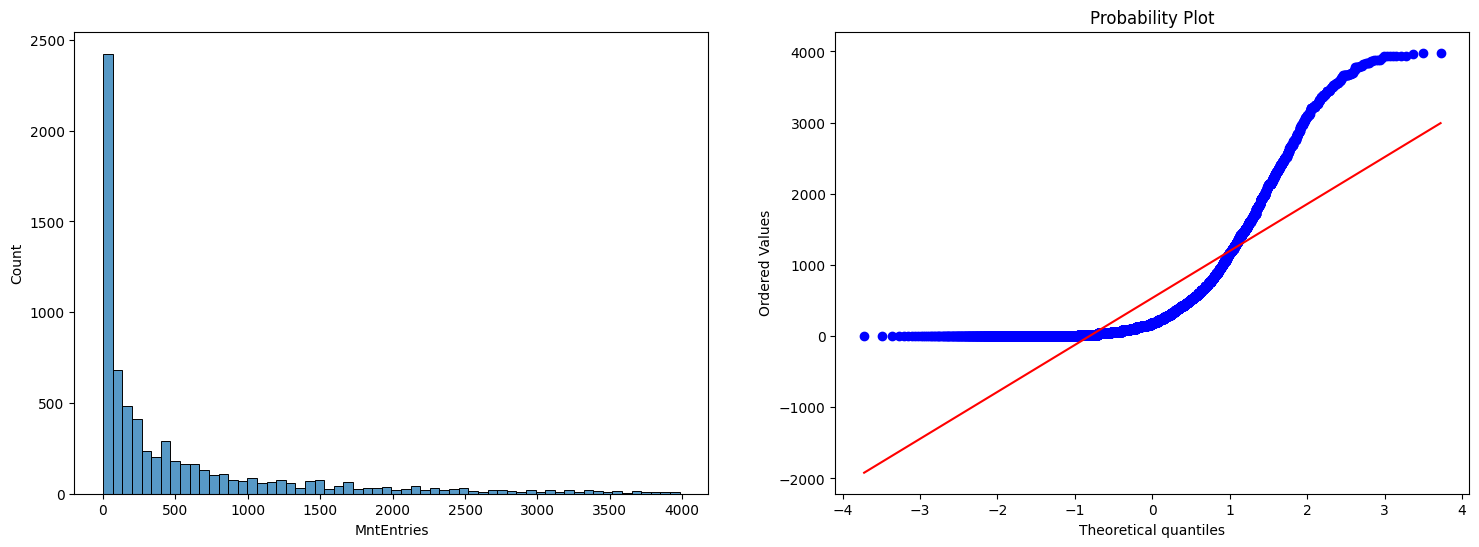

In [125]:
var_analisis = df['MntDrinks']

print("Pre - BoxCox")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(var_analisis, ax=g[0]);
g2 = scs.probplot(var_analisis, dist='norm', plot=plt);

var_analisis = aaa

print("Pre - BoxCox")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(var_analisis, ax=g[0]);
g2 = scs.probplot(var_analisis, dist='norm', plot=plt);



In [107]:
aaa.describe()

count    7000.000000
mean        5.222640
std         2.695304
min         0.000000
25%         4.382183
50%         5.886112
75%         7.215241
max         8.982184
Name: MntEntries, dtype: float64

3819968.4000000004
3833968.4000000004


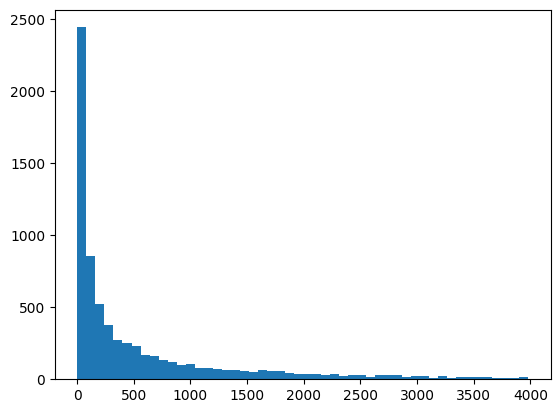

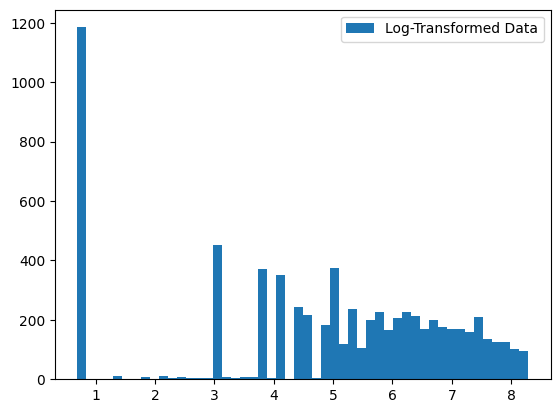

BoxCox
3819968.4000000004
36506.9551054451
ARCSIN
3819968.4000000004
42091.26331072856
ARCSIN


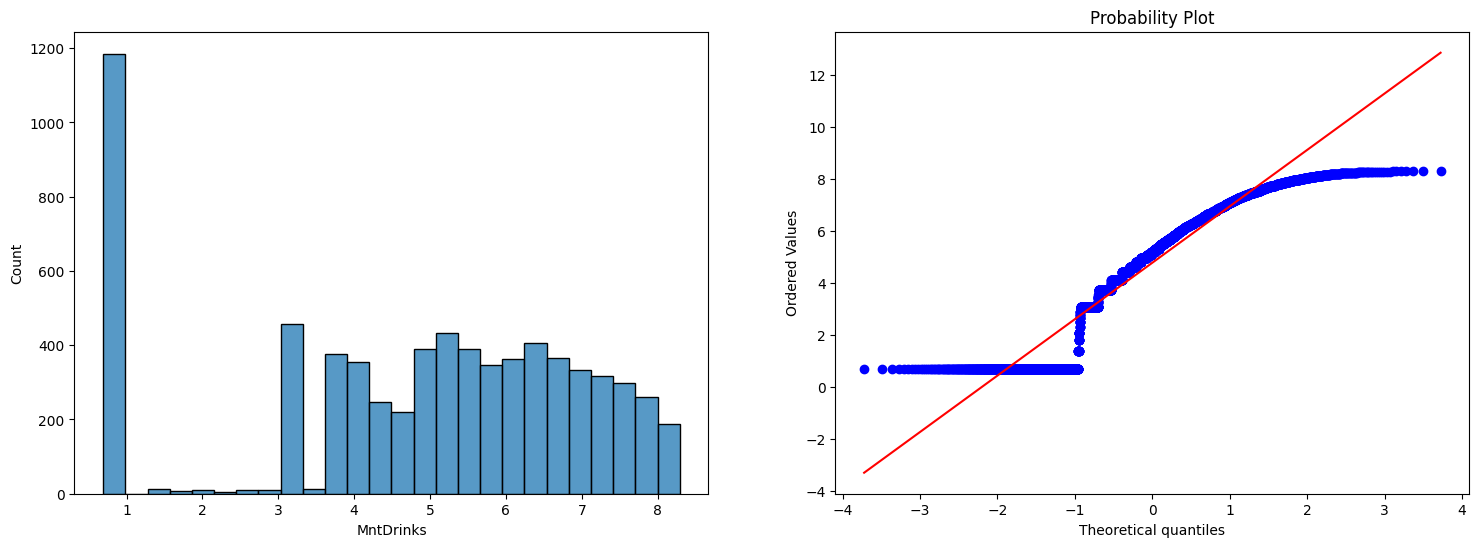

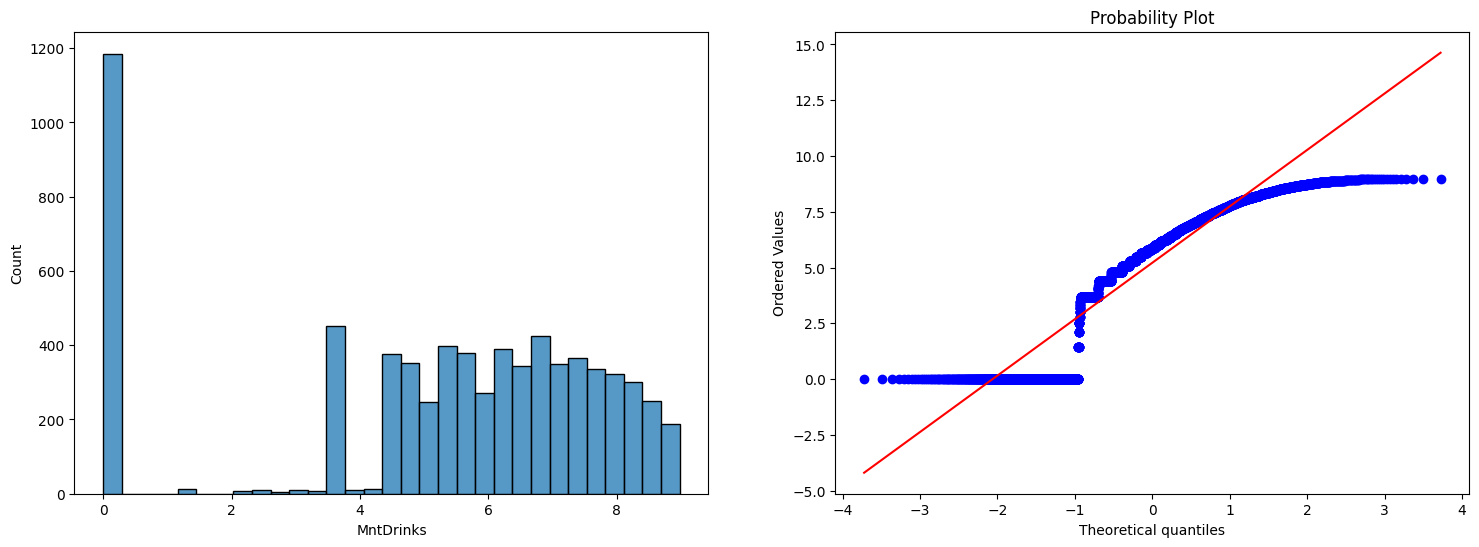

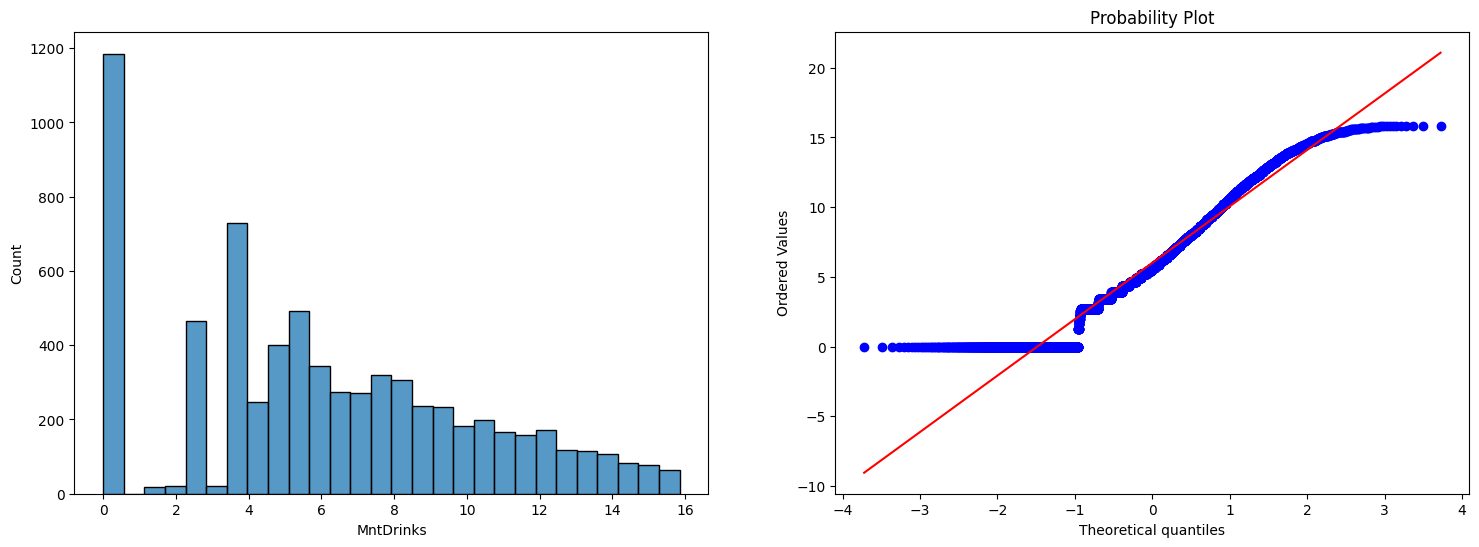

In [131]:
# CENAS PARA TRANSFORMAR EM FUNCAO

import numpy as np
import matplotlib.pyplot as plt

bbb=df
print(df["MntDrinks"].sum())
aaa=bbb['MntDrinks'].apply(lambda x: x+2)
print(aaa.sum())

data=aaa

plt.hist(data, bins=50)
plt.show()

# Apply log transformation to the data
log_data = np.log(data)

# Plot the original data and the log-transformed data
import matplotlib.pyplot as plt

plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

print("BoxCox")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(log_data, ax=g[0]);
g2 = scs.probplot(log_data, dist='norm', plot=plt);

#ARCO COISO
bbb=df
print(df["MntDrinks"].sum())
aaa=bbb['MntDrinks'].apply(lambda x: np.arcsinh(x))
print(aaa.sum())

data=aaa

print("ARCSIN")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(data, ax=g[0]);
g2 = scs.probplot(data, dist='norm', plot=plt);

#RAIZES
bbb=df
print(df["MntDrinks"].sum())
aaa=bbb['MntDrinks'].apply(lambda x: np.cbrt(x))
print(aaa.sum())

data=aaa

print("ARCSIN")
fig , g = plt.subplots(1,2, figsize=(18,6))
g1 = sns.histplot(data, ax=g[0]);
g2 = scs.probplot(data, dist='norm', plot=plt);




In [122]:
log_data.describe()

count    7000.000000
mean        4.953006
std         1.978097
min         1.609438
25%         3.806662
50%         5.220356
75%         6.529419
max         8.290293
Name: MntEntries, dtype: float64

In [132]:
data.describe()

count    7000.000000
mean        6.013038
std         4.136087
min         0.000000
25%         3.419952
50%         5.646216
75%         8.879040
max        15.847510
Name: MntDrinks, dtype: float64